In [1]:
import cv2 
import os 
import sys 
import numpy as np
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [2]:
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.layers import Activation, Dense, Input, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop, SGD 
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, LearningRateScheduler 
from tensorflow.keras.utils import to_categorical, Sequence, model_to_dot 
from tensorflow.python.keras.utils.vis_utils import plot_model
from IPython.display import SVG 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [3]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
drive_path = "/content/drive/MyDrive/"
source_filename = drive_path + "dataset/cat-and-dog.zip"

extract_folder = "dataset/"

import shutil 
shutil.unpack_archive(source_filename, extract_folder)

In [5]:
train_dir = extract_folder + "training_set/training_set"
test_dir = extract_folder + "test_set/test_set"
print(train_dir)
print(test_dir)

dataset/training_set/training_set
dataset/test_set/test_set


In [6]:
image_gen_aug = ImageDataGenerator(rescale=1/255.0, 
                                   horizontal_flip = True, 
                                   rotation_range=35,
                                   zoom_range=0.2)

train_gen = image_gen_aug.flow_from_directory(train_dir, 
                                              batch_size = 32, 
                                              target_size = (224, 224), 
                                              classes = ["cats", "dogs"], 
                                              class_mode = "binary",
                                              seed = 2020)

test_gen = image_gen_aug.flow_from_directory(test_dir,
                                             batch_size = 32,
                                             target_size = (224, 224),
                                             classes = ["cats", "dogs"],
                                             class_mode = "binary",
                                             seed = 2020)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [8]:
def set_build_model():
    model = Sequential([
                        BatchNormalization(), 
                        Conv2D(filters=32, kernel_size=(3,3), padding="same"), 
                        Activation("relu"), 
                        MaxPooling2D(2, 2),
                        
                        BatchNormalization(), 
                        Conv2D(filters=64, kernel_size=(3, 3), padding="same"), 
                        Activation("relu"),
                        MaxPooling2D(2, 2),
                        
                        BatchNormalization(), 
                        Conv2D(filters=64, kernel_size=(3, 3), padding="same"), 
                        Activation("relu"),
                        MaxPooling2D(2, 2), 
                         
                        Flatten(),
                        Dense(256, activation="relu"),
                        Dropout(0.3),
                        Dense(1, activation="sigmoid")])

    return model 

In [9]:
model = set_build_model()
# plot_model(model, show_shapes=True, show_layer_names=True)


In [10]:
model.compile(optimizer=tf.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=['accuracy'])

history_aug = model.fit(train_gen, validation_data=test_gen, epochs=40)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


251/251 [==============================] - 128s 498ms/step - loss: 1.5506 - accuracy: 0.5604 - val_loss: 0.7430 - val_accuracy: 0.5111
Epoch 2/40
251/251 [==============================] - 123s 488ms/step - loss: 0.6396 - accuracy: 0.6236 - val_loss: 0.6379 - val_accuracy: 0.6535
Epoch 3/40
251/251 [==============================] - 124s 492ms/step - loss: 0.6287 - accuracy: 0.6443 - val_loss: 0.6271 - val_accuracy: 0.6411
Epoch 4/40
251/251 [==============================] - 123s 491ms/step - loss: 0.6199 - accuracy: 0.6517 - val_loss: 0.5973 - val_accuracy: 0.6822
Epoch 5/40
251/251 [==============================] - 123s 491ms/step - loss: 0.6268 - accuracy: 0.6515 - val_loss: 0.6792 - val_accuracy: 0.6085
Epoch 6/40
251/251 [==============================] - 123s 491ms/step - loss: 0.5949 - accuracy: 0.6771 - val_loss: 0.5784 - val_accuracy: 0.6817
Epoch 7/40
251/251 [==============================] - 124s 493ms/step - loss: 0.5771 - accuracy: 0.6956 - val_loss: 0.6007 - val_accura

In [16]:
def get_plot_acc_loss(history, epochs):
    loss, val_loss = history.history["loss"], history.history["val_loss"]
    acc, val_acc = history.history["accuracy"], history.history["val_accuracy"]

    figure, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epochs+1), loss, label=["Training"])
    axes[0].plot(range(1, epochs+1), val_loss, label=["Validation"])
    axes[0].legend(loc="best")
    axes[0].set_title("loss")

    axes[1].plot(range(1, epochs+1), acc, label=["Training"])
    axes[1].plot(range(1, epochs+1), val_acc, label=["Validation"])
    axes[1].legend(loc="best")
    axes[1].set_title("acc")

    plt.tight_layout()
    plt.show()

    

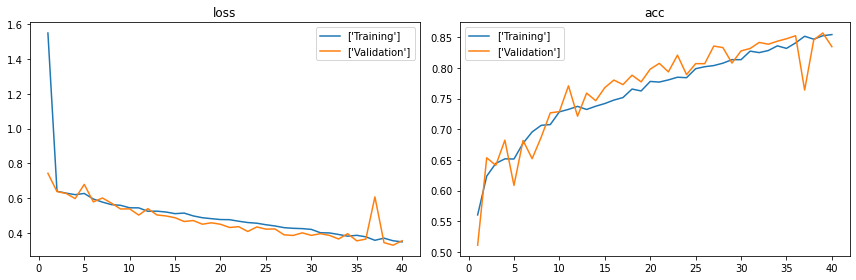

In [17]:
get_plot_acc_loss(history_aug, 40)